In [1]:
import pandas as pd
from data import Data

import numpy as np

In [2]:
data = Data("project_train.csv")
data.df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
0,0.545,0.884,5,-4.807,0,0.3670,0.290000,0.000000,0.3700,0.641,86.049,1
1,0.795,0.545,7,-8.153,1,0.3430,0.003960,0.000000,0.2730,0.809,91.967,1
2,0.489,0.871,5,-5.825,1,0.3860,0.002850,0.000004,0.1300,0.341,117.431,1
3,0.539,0.931,4,-1.803,0,0.2620,0.000713,0.000000,0.2040,0.685,85.571,0
4,0.918,0.734,11,-2.832,0,0.2690,0.029400,0.000008,0.1910,0.608,97.044,1
...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.897,0.612,11,-10.489,1,0.2110,0.029700,0.186000,0.0894,0.767,102.305,1
501,0.728,0.454,0,-9.281,1,0.0278,0.512000,0.000001,0.0831,0.323,130.368,0
502,0.571,0.837,0,-5.604,1,0.0377,0.165000,0.000005,0.1700,0.713,141.660,1
503,0.582,0.720,10,-9.722,0,0.2310,0.012700,0.035300,0.3630,0.541,89.273,1


In [3]:
data.df.loc[84, "energy"] = 0.734
data.df.loc[94, "loudness"] = -6.542

<AxesSubplot:>

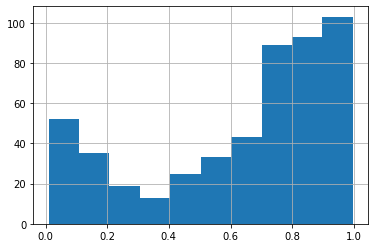

In [4]:
data.df["energy"].hist()

In [5]:
data.preprocess(shuffle=True, remove_duplicates=True)

There were 6 duplicated elements in the dataset, and have been removed from the dataframe


In [6]:
#data.visualize()

In [7]:
data.vif

,variables,VIF
0,danceability,2.796146
1,energy,8.518303
2,speechiness,1.275336
3,acousticness,5.609741
4,instrumentalness,3.728579
5,liveness,1.173207
6,valence,2.314736
7,loudness,7.606633
8,tempo,1.267406
9,key_0,1.340408


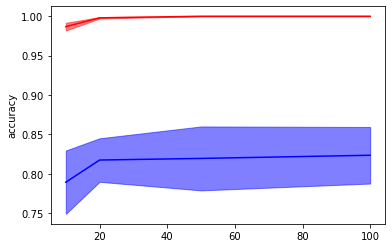

In [12]:
from learning_machine import RandomForest

criterion = [10, 20, 50, 100]
randomforest = RandomForest(data)
randomforest.parameter_search(criterion)

The model has been trained using 100, whih maximizes the test accuracy to 0.82 ± 0.04
The RandomForest model has been trained on the given data
accuracy : 1.0
recall : 1.0
precision : 1.0
F1 : 1.0


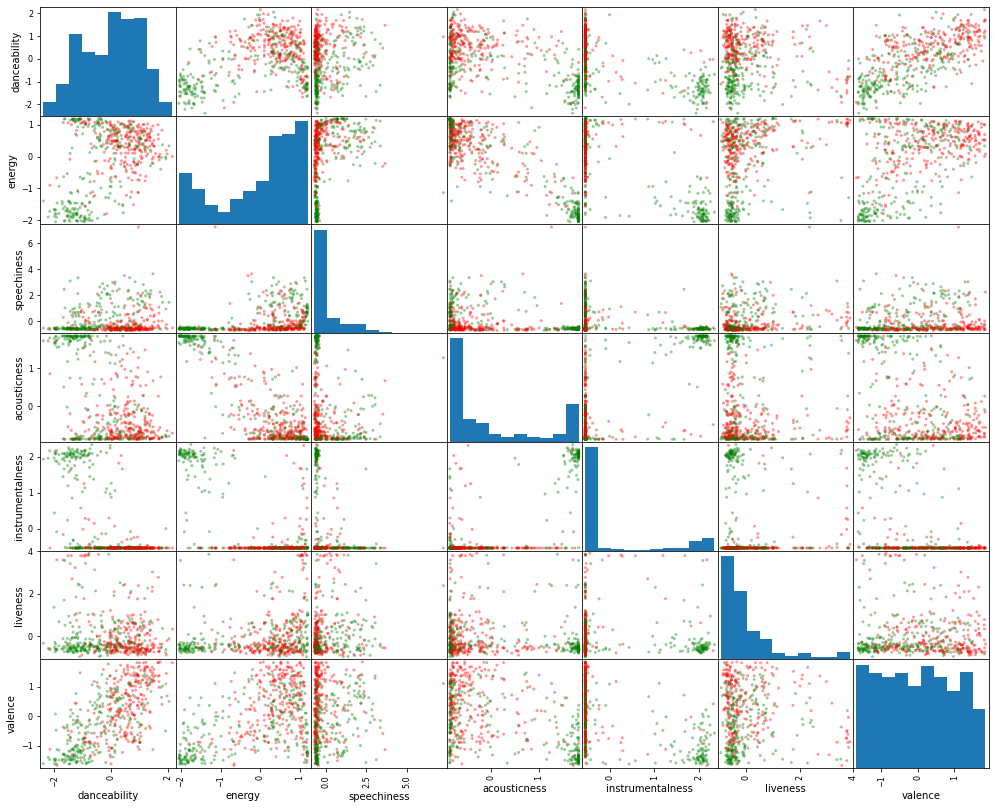

In [13]:
randomforest.fit_all_data_with_best_parameters()

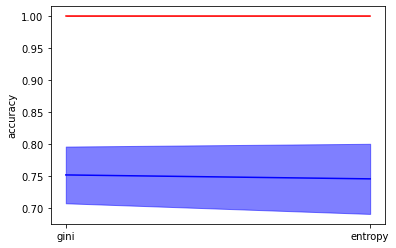

In [8]:
from learning_machine import ClassificationTrees

criterion = ["gini", "entropy"]
trees = ClassificationTrees(data)
trees.parameter_search(criterion)

The model has been trained using gini, whih maximizes the test accuracy to 0.75 ± 0.04
The ClassificationTrees model has been trained on the given data
accuracy : 1.0
recall : 1.0
precision : 1.0
F1 : 1.0


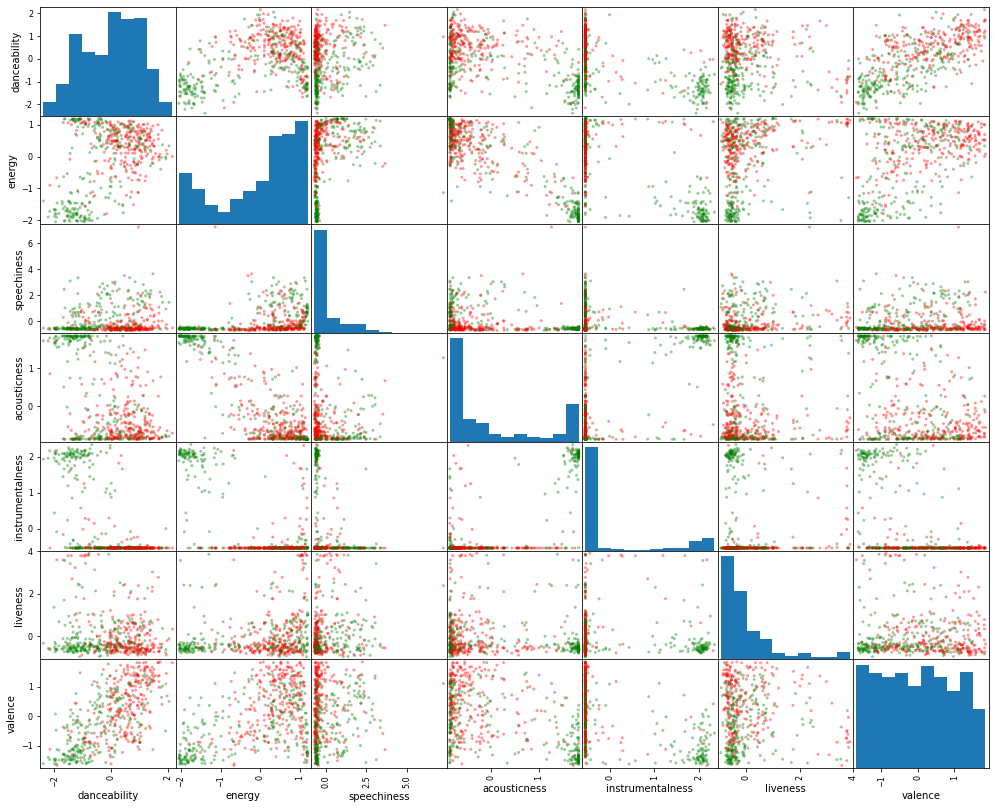

In [9]:
trees.fit_all_data_with_best_parameters()

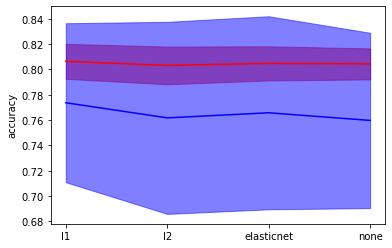

In [9]:
from learning_machine import LogisticRegression

penalty = ["l1", "l2", "elasticnet", "none"]
logistic = LogisticRegression(data)
logistic.parameter_search(penalty)

The model has been trained using l2, whih maximizes the test accuracy to 0.79 ± 0.04
The Logistic Regression model has been trained on the given data
accuracy : 0.8036072144288577
recall : 0.848
precision : 0.7794117647058824
F1 : 0.8122605363984675


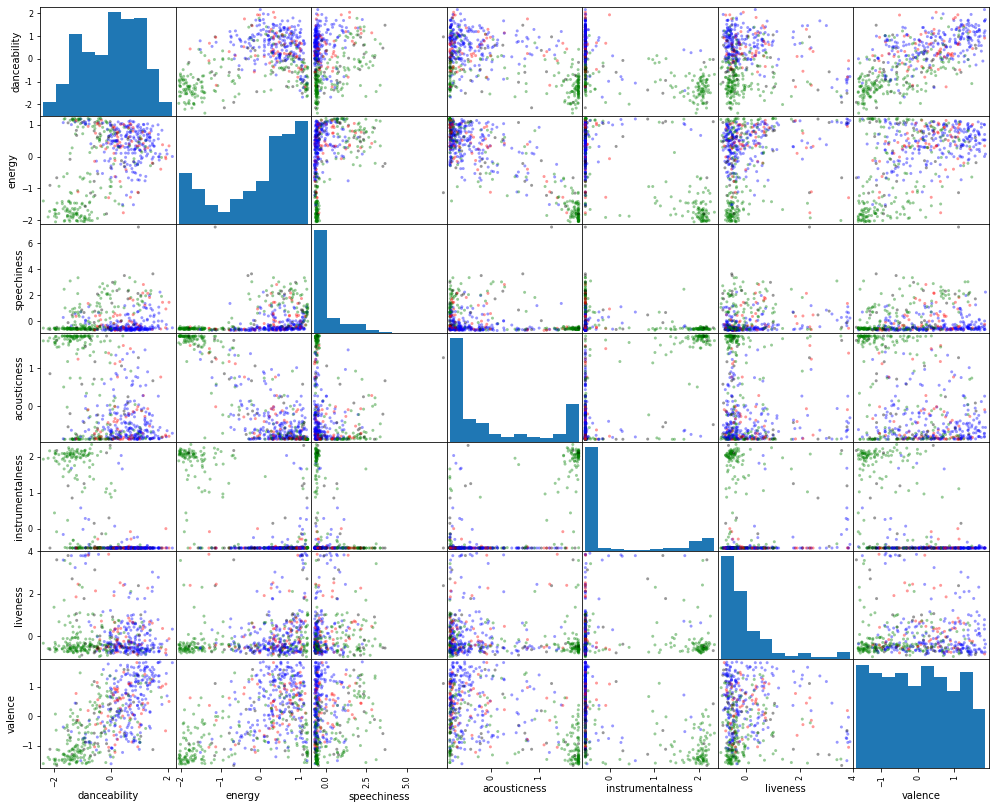

In [18]:
logistic.fit_all_data_with_best_parameters()

In [10]:
df = logistic.print_table_with_results()
df

None


In [11]:
from learning_machine import DecisionTrees
tree = DecisionTrees(data)
tree.cross_validation()
print(tree.metrics)

{0: {'Train Accuracy': [1.0, 0.0], 'Test Accuracy': [0.7755067890610059, 0.020892453425954857], 'Train Recall': [1.0, 0.0], 'Test Recall': [0.7883427797582181, 0.06947761725345024], 'Train Precision': [1.0, 0.0], 'Test Precision': [0.7779326366787668, 0.060488663338114305], 'Train F1 score': [1.0, 0.0], 'Test F1 score': [0.7779807935602802, 0.015685381895299992]}}


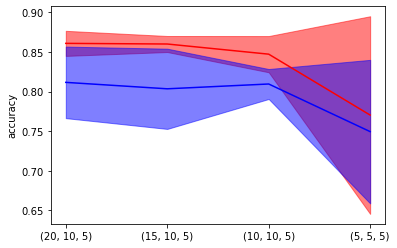

In [19]:
from learning_machine import NeuralNetwork

hidden_layers = [(20,10,5), (15,10,5), (10,10,5), (5,5,5)]
NN = NeuralNetwork(data)
NN.parameter_search(hidden_layers, layers_or_width="both")

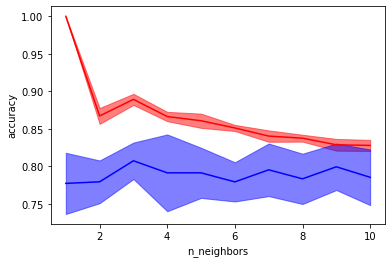

In [12]:
from learning_machine import KNearest

Ns = [1,2,3,4,5,6,7,8,9,10]
knearest = KNearest(data)
knearest.parameter_search(Ns)


In [13]:
from learning_machine import LDA
lda = LDA(data)
lda.cross_validation()
print(lda.metrics)

The LDA model has been trained on the given data
{0: {'Train Accuracy': [0.8056166975594686, 0.018221516346071838], 'Test Accuracy': [0.7835150124306751, 0.03771428801063802], 'Train Recall': [0.8712539806175839, 0.01177358880622133], 'Test Recall': [0.8579326327383908, 0.10600916816583517], 'Train Precision': [0.7711923331439502, 0.018779095586049427], 'Test Precision': [0.7521324522943394, 0.03453950245449949], 'Train F1 score': [0.8180942050371836, 0.014150654977394175], 'Test F1 score': [0.7967826022293586, 0.039717744190882774]}}


In [14]:
from learning_machine import QDA

qda = QDA(data)
qda.cross_validation(shuffle=True)
print(qda.metrics)
print(qda.fitting_parameters)

The QDA model has been trained on the given data
{0: {'Train Accuracy': [0.7863714473277726, 0.018078951483911407], 'Test Accuracy': [0.7032415375788871, 0.05164088862949459], 'Train Recall': [0.7944703583475268, 0.07423607667082682], 'Test Recall': [0.7075888141105532, 0.15223666457920276], 'Train Precision': [0.7858191335442183, 0.03389747782326036], 'Test Precision': [0.7142745224161705, 0.07306574229692327], 'Train F1 score': [0.7868992410794796, 0.027956528451199086], 'Test F1 score': [0.6962228736138693, 0.06748376909914136]}}
{0: {'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}}


The QDA model has been trained on the given data
accuracy : 0.7855711422845691
recall : 0.82
precision : 0.7677902621722846
F1 : 0.7930367504835589


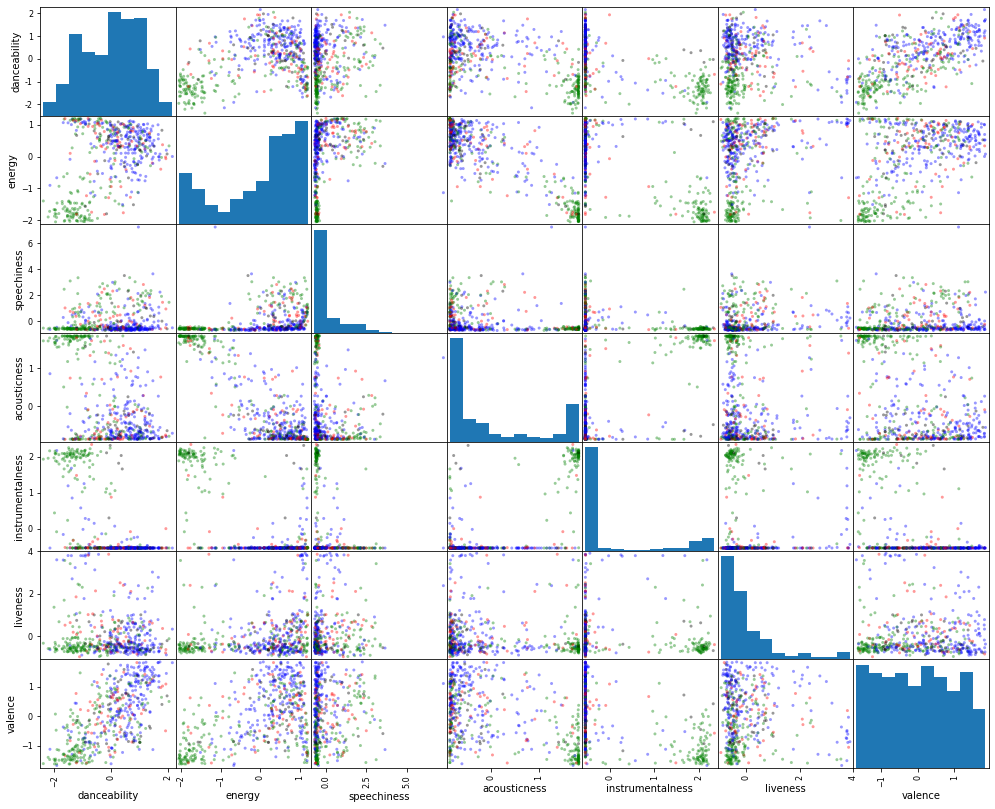

In [15]:
qda.fit_with_all_data()